# llm_perf dataset

In [2]:
import pandas as pd

df = pd.read_csv('data/aggregated_llm_perf.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             1944 non-null   object 
 1   throughput        1944 non-null   float64
 2   response_length   1944 non-null   int64  
 3   latency           1944 non-null   float64
 4   energy            1944 non-null   float64
 5   gpu               1944 non-null   object 
 6   task              1944 non-null   object 
 7   parameters_count  1944 non-null   float64
 8   energy_per_token  1944 non-null   float64
 9   dtype             1944 non-null   object 
 10  optimization      408 non-null    object 
 11  quantization      1180 non-null   object 
 12  cuda-fp16         1944 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 184.3+ KB
None


In [4]:
print(df.describe())

        throughput  response_length      latency        energy  \
count  1944.000000           1944.0  1944.000000   1944.000000   
mean     67.711569            256.0     8.396854   2276.563058   
std      73.213402              0.0     8.606695   2298.845976   
min       3.380000            256.0     0.394000     57.231360   
25%      26.700000            256.0     3.330000    836.812800   
50%      40.750000            256.0     6.285000   1700.352000   
75%      76.900000            256.0     9.600000   2803.968000   
max     650.000000            256.0    75.700000  20459.520000   

       parameters_count  energy_per_token  
count       1944.000000       1944.000000  
mean           6.121422          0.002470  
std            9.428142          0.002494  
min            0.001000          0.000062  
25%            0.410000          0.000908  
50%            3.000000          0.001845  
75%            7.000000          0.003043  
max           70.000000          0.022200  


In [5]:
from IPython.display import display
display(df)

,model,throughput,response_length,latency,energy,gpu,task,parameters_count,energy_per_token,dtype,optimization,quantization,cuda-fp16
0,EleutherAI/gpt-neox-20b,27.4,256,9.34,3013.6320,NVIDIA A100-SXM4-80GB,chat,20.00,0.003270,float16,NaN,gptq-4bit+exllama-v1,False
1,EleutherAI/pythia-6.9b-deduped,42.3,256,6.05,1649.6640,NVIDIA A100-SXM4-80GB,chat,6.90,0.001790,float16,NaN,gptq-4bit+exllama-v1,False
2,EleutherAI/pythia-6.7b,39.9,256,6.41,1686.5280,NVIDIA A100-SXM4-80GB,chat,6.70,0.001830,float16,NaN,gptq-4bit+exllama-v1,False
3,EleutherAI/pythia-1.4b-deduped,54.8,256,4.67,1115.1360,NVIDIA A100-SXM4-80GB,chat,1.40,0.001210,float16,NaN,gptq-4bit+exllama-v1,False
4,EleutherAI/gpt-j-6b,30.8,256,8.31,2119.6800,NVIDIA A100-SXM4-80GB,chat,6.00,0.002300,float16,NaN,gptq-4bit+exllama-v1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,ai-forever/mGPT,98.8,256,2.59,684.7488,NVIDIA GeForce RTX 4090,chat,1.30,0.000743,float32,NaN,NaN,False
1940,bigscience/bloom-3b,65.3,256,3.92,1041.4080,NVIDIA GeForce RTX 4090,chat,3.00,0.001130,float32,NaN,NaN,False
1941,togethercomputer/RedPajama-INCITE-Base-3B-v1,60.4,256,4.24,1041.4080,NVIDIA GeForce RTX 4090,chat,3.00,0.001130,float32,NaN,NaN,False
1942,ahxt/LiteLlama-460M-1T,127.0,256,2.01,321.6384,NVIDIA GeForce RTX 4090,chat,0.46,0.000349,float32,NaN,NaN,False


# Analyse de parameters_count 

In [6]:
parameters_count_column = df['parameters_count']

entity_counts = parameters_count_column.value_counts()

print("Nombre total d'entités uniques :", len(entity_counts))
print("\nNombre de chaque entité :")
print(entity_counts)

Nombre total d'entités uniques : 72

Nombre de chaque entité :
parameters_count
7.000     347
3.000     122
1.300     101
13.000    100
0.031      96
         ... 
1.610       7
0.430       6
0.169       6
70.000      5
2.780       4
Name: count, Length: 72, dtype: int64


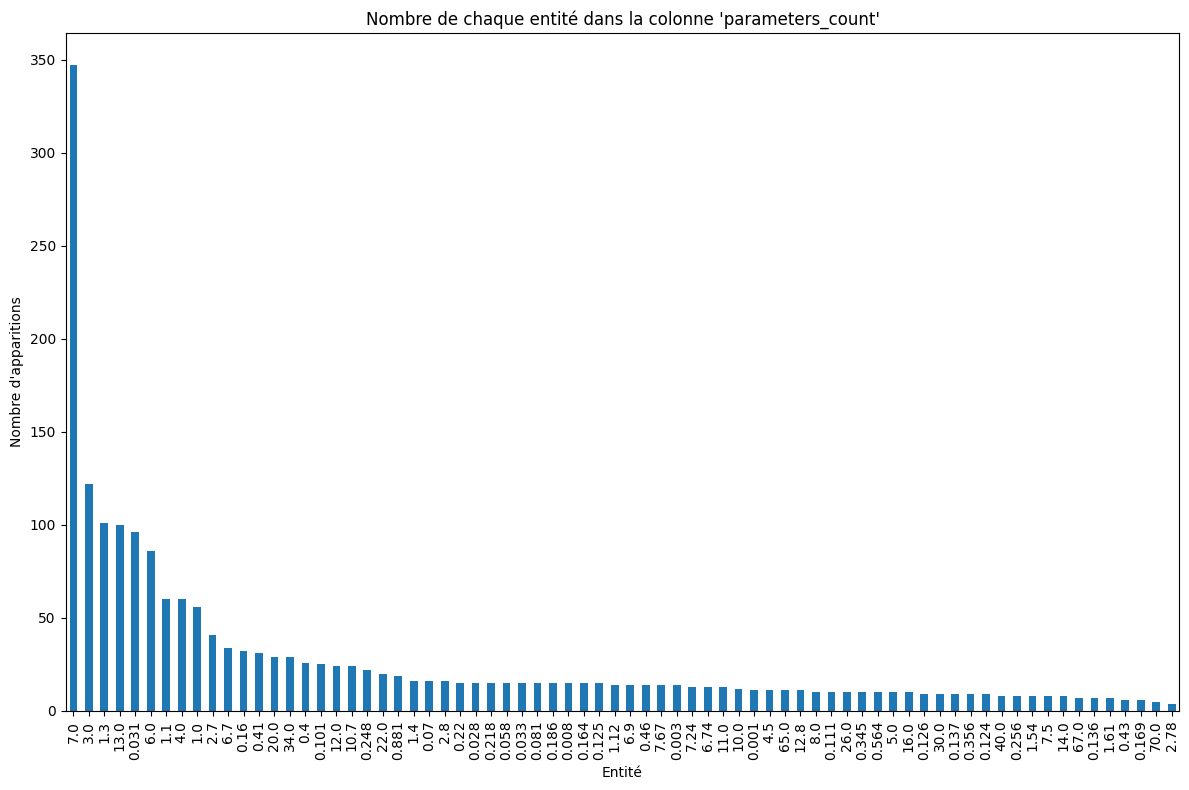

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

entity_counts.plot(kind='bar')

plt.title("Nombre de chaque entité dans la colonne 'parameters_count'")
plt.xlabel('Entité')
plt.ylabel('Nombre d\'apparitions')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_encoded = df.copy()

le = LabelEncoder()

cols_to_encode = ['model', 'gpu', 'task',
                  'dtype', 'optimization', 'quantization']

encoding_dict = {}

for col in cols_to_encode:
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    encoding_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))

print(df_encoded.dtypes)

for col, mapping in encoding_dict.items():
    print(f'Encodage pour {col}:')
    for key, value in mapping.items():
        print(f'{key} -> {value}')
    print()

df_encoded.to_csv('data_encoded.csv', index=False)

model                 int64
throughput          float64
response_length       int64
latency             float64
energy              float64
gpu                   int64
task                  int64
parameters_count    float64
energy_per_token    float64
dtype                 int64
optimization          int64
quantization          int64
cuda-fp16              bool
dtype: object
Encodage pour model:
01-ai/Yi-34B -> 0
01-ai/Yi-34B-200K -> 1
01-ai/Yi-6B -> 2
01-ai/Yi-6B-200K -> 3
AI-Sweden-Models/gpt-sw3-1.3b -> 4
AI-Sweden-Models/gpt-sw3-126m -> 5
AI-Sweden-Models/gpt-sw3-20b -> 6
AI-Sweden-Models/gpt-sw3-356m -> 7
AI-Sweden-Models/gpt-sw3-40b -> 8
AI-Sweden-Models/gpt-sw3-6.7b -> 9
AI-Sweden-Models/gpt-sw3-6.7b-v2 -> 10
BEE-spoke-data/Mixtral-GQA-400m-v2 -> 11
BEE-spoke-data/NanoLlama-GQA-L10-A32_KV8-v13-KI -> 12
BEE-spoke-data/smol_llama-101M-GQA -> 13
BEE-spoke-data/smol_llama-220M-GQA -> 14
BEE-spoke-data/smol_llama-81M-tied -> 15
BEE-spoke-data/verysmol_llama-v11-KIx2 -> 16
Dampish/Ste

| Colonne         | Nombre de Catégories | Détails des Catégories Encodées                     |
|-----------------|----------------------|-----------------------------------------------------|
| model           | 181                  | Voir Encodage pour model                            |
| gpu             | 2                    | 0: NVIDIA A100-SXM4-80GB, 1: NVIDIA GeForce RTX 4090|
| task            | 1                    | 0: chat                                            |
| dtype           | 3                    | 0: bfloat16, 1: float16, 2: float32                 |
| optimization    | 3                    | 0: BetterTransformer, 1: FlashAttentionV2, 2: nan  |
| quantization    | 8                    | 0: awq-4bit+gemm, 1: awq-4bit+gemv, 2: bnb-4bit,   |
|                 |                      | 3: bnb-8bit, 4: gptq-4bit, 5: gptq-4bit+exllama-v1,|
|                 |                      | 6: gptq-4bit+exllama-v2, 7: nan                     |


# quelques explication sur les entites 


#  - - - dtype - - -

# bfloat16 : Le format bfloat16 (brain floating point) est un format de nombre informatique qui occupe 16 bits dans la mémoire de l’ordinateur1. Fait pour une utilisation dans TensorFlow et TPU (Tensor Processing Unit).

# float16 : Le format float16, est un format de nombre à virgule flottante binaire qui occupe 16 bits (deux octets dans les ordinateurs modernes) dans la mémoire de l’ordinateur. Il est destiné au stockage des valeurs à virgule flottante dans les applications où une précision plus élevée n’est pas essentielle, en particulier le traitement d’images et les réseaux neuronaux


# float32 : Le format float32, est un format de nombre à virgule flottante binaire qui occupe 32 bits dans la mémoire de l’ordinateur. Il représente une large plage dynamique de valeurs numériques en utilisant un point de base flottant.


# La quantification des réseaux neuronaux à ces trois formats de données (bfloat16, float16, float32):

# bfloat16 : Ce format peut être utilisé pour la quantification car il utilise moins de mémoire que le format float32 tout en conservant une plage dynamique similaire. Cela peut être utile pour les réseaux neuronaux profonds où la précision n’est pas aussi cruciale, mais où la plage dynamique est importante.

# float16 : Ce format est également utilisé pour la quantification. Il utilise moins de mémoire que le format float32, mais il a une plage dynamique plus petite. Cela peut être utile pour les réseaux neuronaux où la précision est importante, mais où la plage dynamique peut être sacrifiée.

# (Plage dynamique (dynamic range) désigne l'intervalle de valeurs positives et négatives pouvant être représentées par un format de nombre à virgule flottante tel que float16, float32 or bfloat16. Ces intervalles varient selon le format ; plus le format dispose de bits, plus la plage dynamique sera généralemenet large.)

# float32 : C’est le format standard pour les poids, les biais et les activations dans les réseaux neuronaux. Cependant, il utilise beaucoup de mémoire et de puissance de calcul. La quantification vise à remplacer ce format par des formats de moindre précision (comme bfloat16 ou float16) pour réduire l’empreinte mémoire et les demandes de calcul.


# Parmi les trois formats de données, le format float32 est celui qui demande le plus de ressources de calcul. En effet, les opérations sur des nombres à virgule flottante de 32 bits sont plus coûteuses en termes de calcul que les opérations sur des nombres à virgule flottante de 16 bits ou des nombres bfloat16. 



# - - - optimization - - -

# BetterTransformer : Il s'agit d'une implémentation améliorée du transformeur qui utilise des algorithmes plus rapides et moins gourmands en mémoire pour calculer l'auto-attention. Elle est souvent utilisée pour accélérer l'inférence et permettre aux grands langages modèles (LLM) de traiter des séquences d'entrées plus longues sans manquer de mémoire.

# FlashAttentionV2 : Cette version mise à jour de FlashAttention offre un gain de performances supplémentaire par rapport à sa première itération. FlashAttention V2 fournit une méthode alternative pour calculer l'auto-attention qui nécessite plus de FLOPS mais réduit considérablement la demande sur la mémoire haut débit de la GPU. Ceci se traduit par une augmentation significative de la vitesse pendant l'inférence.

# En résumé, ces deux options sont axées sur l'optimisation des performances lors du calcul de l'auto-attention, soit en termes de vitesse, soit en termes de consommation de mémoire. 



# - - - quantization - - - 


# La quantification consiste à réduire la précision des nombres utilisés pour représenter les données dans un modèle, généralement enapproximant les valeurs flottantes avec des entiers sur une largeur de bits inférieure. Ce processus peut contribuer à diminuer l'empreinte mémoire et les besoins en calcul des modèles, ce qui permet de les exécuter plus efficacement sur certains matériels. Voici une explication de chaque type de quantification mentionné :

# awq-4bit : La quantification d'approximation du poids (Awq) est une méthode de quantification des poids dans les modèles d'apprentissage profond en utilisant des représentations à faible précision tout en minimisant la perte de précision. Les "4bits" indiquent que les poids sont représentés à l'aide de 4 bits .


# awq-4bit + gemm : GEMM signifie Produit Matriciel Général, une opération courante trouvée dans de nombreuses couches de réseaux neuronaux. Dans ce cas, l'Awq-4bit est appliqué spécifiquement aux poids utilisés pendant les opérations GEMM.

# awq-4bit + gemv : GEMV signifie Multiplication Matrice Vecteur Générale, une autre opération courante d'algèbre linéaire présente dans les réseaux neuronaux. De manière similaire au point ci-dessus, l'Awq-4bit est utilisé pour les poids impliqués dans ces opérations GEMV.


# bnb-4bit : Le Narrowing par Bit (BNB) est une approche différente de la quantification où plutôt qu'une approximation directe des poids à pleine précision. Le BNB-4bit stocke les poids raffinés en utilisant seulement 4 bits, offrant ainsi jusqu'à 16 valeurs de poids distinctes.

# bnb-8bit : Même principe que BNB-4bit mais cette fois-ci en utilisant 8 bits, fournissant une meilleure précision au détriment d'un espace de stockage supplémentaire requis.

# gptq-4bit : La quantification par regroupement de précisions adaptatives (GPTQ) est une technique de quantification conçue pour minimiser l'impact des calculs en faible précision lors de l'exécution des réseaux de neurones convolutionnels (ConvNets). Elle regroupe dynamiquement les canaux au sein d'une couche basée sur la similarité et y applique des facteurs d'échelle avant la quantification. Tout comme les autres méthodes présentées, il stocke les résultats sous forme de 4 bits.

# gptq-4bit + exllama-v1, gptq-4bit + exllama-v2 : Ces variantes combinent GPTQ avec les versions Exllama v1 ou v2 respectivement. Il s'agit  d'une mise en oeuvre spécifique liée au traitement des entrées du ConvNet ou à la réalisation de tâches supplémentaires.

# nan : Non applicable ; incluse possiblement comme marqueur indiquant qu'aucune quantification n'a été effectuée sur certains de ces modèles particuliers.

In [12]:
display(df_encoded)

,model,throughput,response_length,latency,energy,gpu,task,parameters_count,energy_per_token,dtype,optimization,quantization,cuda-fp16
0,28,27.4,256,9.34,3013.6320,0,0,20.00,0.003270,1,2,5,False
1,42,42.3,256,6.05,1649.6640,0,0,6.90,0.001790,1,2,5,False
2,41,39.9,256,6.41,1686.5280,0,0,6.70,0.001830,1,2,5,False
3,31,54.8,256,4.67,1115.1360,0,0,1.40,0.001210,1,2,5,False
4,24,30.8,256,8.31,2119.6800,0,0,6.00,0.002300,1,2,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,83,98.8,256,2.59,684.7488,1,0,1.30,0.000743,2,2,7,False
1940,89,65.3,256,3.92,1041.4080,1,0,3.00,0.001130,2,2,7,False
1941,175,60.4,256,4.24,1041.4080,1,0,3.00,0.001130,2,2,7,False
1942,81,127.0,256,2.01,321.6384,1,0,0.46,0.000349,2,2,7,False


#  Analyse descriptive pour chaque variable


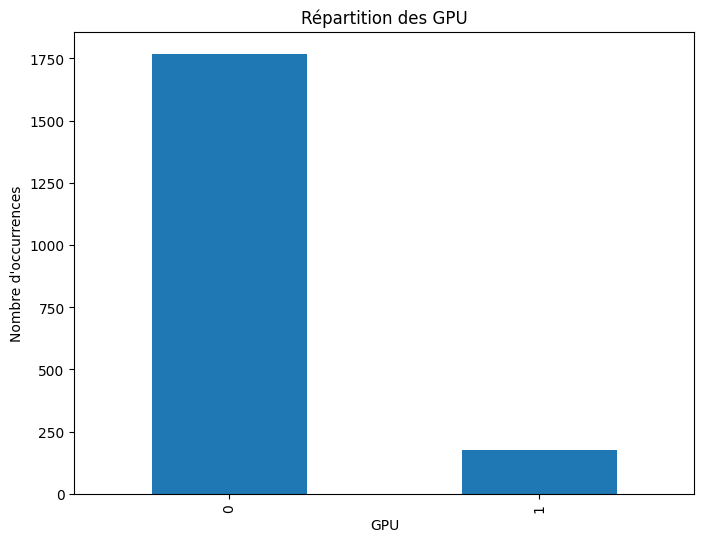

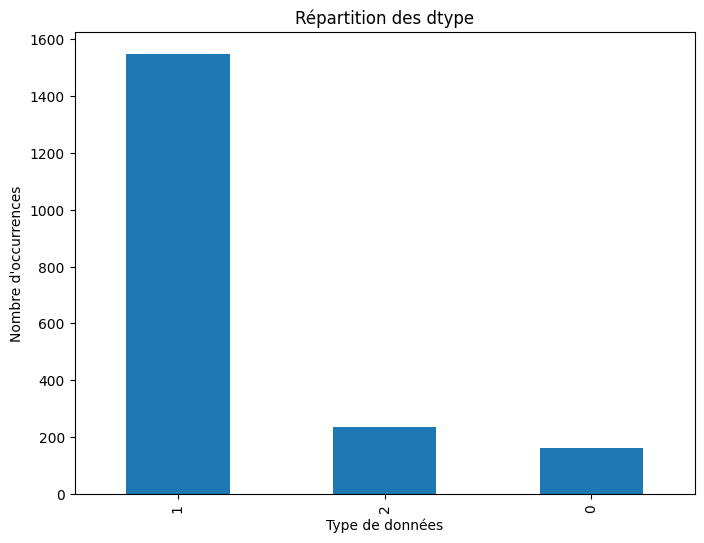

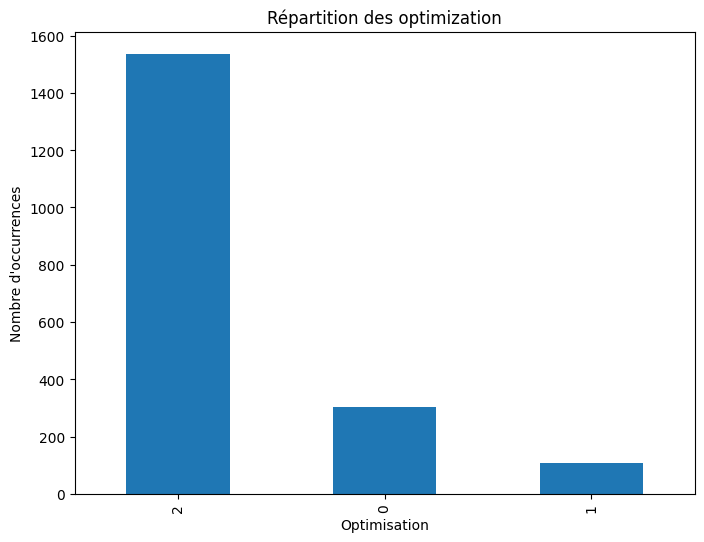

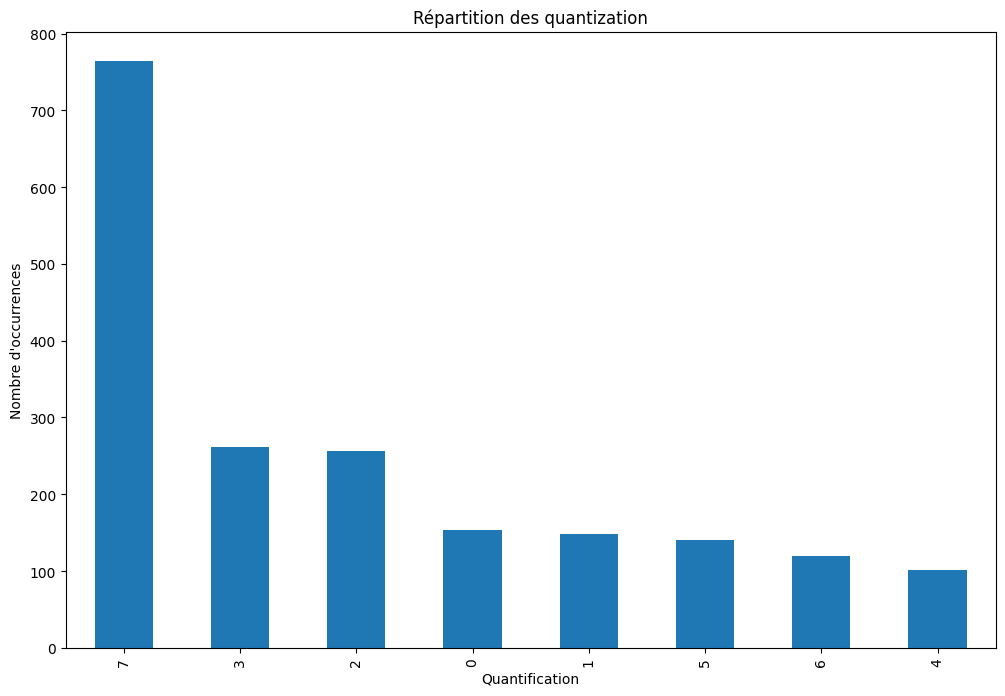

In [14]:
import matplotlib.pyplot as plt

# gpu
plt.figure(figsize=(8, 6))
df_encoded['gpu'].value_counts().plot(kind='bar')
plt.title('Répartition des GPU')
plt.xlabel('GPU')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# dtype
plt.figure(figsize=(8, 6))
df_encoded['dtype'].value_counts().plot(kind='bar')
plt.title('Répartition des dtype')
plt.xlabel('Type de données')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# optimization
plt.figure(figsize=(8, 6))
df_encoded['optimization'].value_counts().plot(kind='bar')
plt.title('Répartition des optimization')
plt.xlabel('Optimisation')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# quantization
plt.figure(figsize=(12, 8))
df_encoded['quantization'].value_counts().plot(kind='bar')
plt.title('Répartition des quantization')
plt.xlabel('Quantification')
plt.ylabel('Nombre d\'occurrences')
plt.show()

#  Analyse plus poussée pour chaque variable


# étudier la relation entre la variable 'dtype' et la variable 'energy'

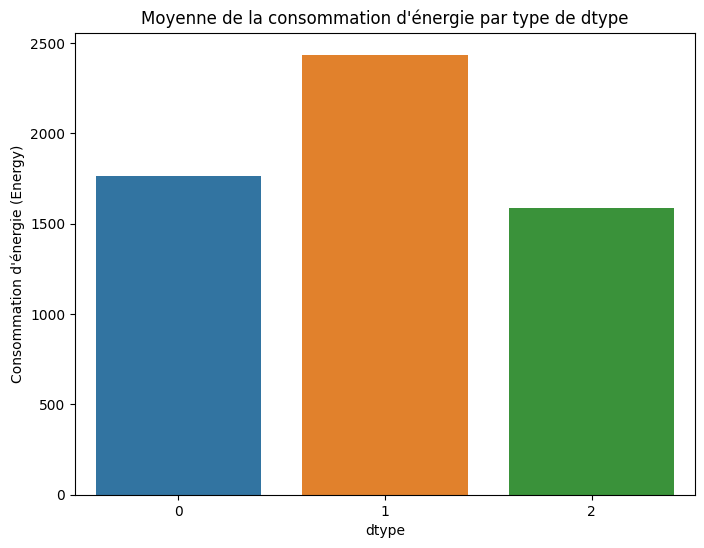

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la moyenne de 'energy' pour chaque type de 'dtype'
dtype_energy_mean = df_encoded.groupby('dtype')['energy'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='dtype', y='energy', data=dtype_energy_mean)
plt.title('Moyenne de la consommation d\'énergie par type de dtype')
plt.xlabel('dtype')
plt.ylabel('Consommation d\'énergie (Energy)')
plt.show()


# Calcul de la moyenne de la variable 'energy' pour chaque type d'optimization

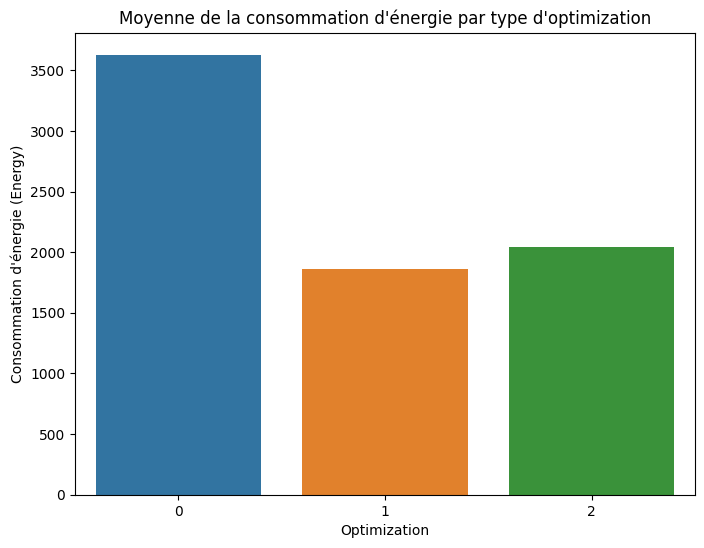

In [20]:
optimization_energy_mean = df_encoded.groupby(
    'optimization')['energy'].mean().reset_index()

# Visualisation
plt.figure(figsize=(8, 6))
sns.barplot(x='optimization', y='energy', data=optimization_energy_mean)
plt.title('Moyenne de la consommation d\'énergie par type d\'optimization')
plt.xlabel('Optimization')
plt.ylabel('Consommation d\'énergie (Energy)')
plt.show()

# Calcul de la moyenne de la variable 'energy' pour chaque type de 'quantization' 

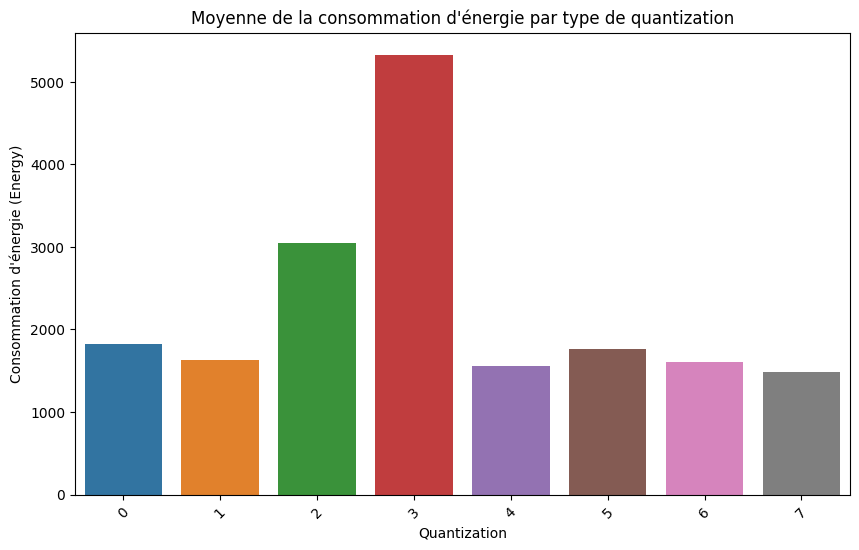

In [21]:
quantization_energy_mean = df_encoded.groupby(
    'quantization')['energy'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='quantization', y='energy', data=quantization_energy_mean)
plt.title('Moyenne de la consommation d\'énergie par type de quantization')
plt.xlabel('Quantization')
plt.ylabel('Consommation d\'énergie (Energy)')
plt.xticks(rotation=45)
plt.show()

# energy ou energy_per_token c'est les meme resultats a chaque fois

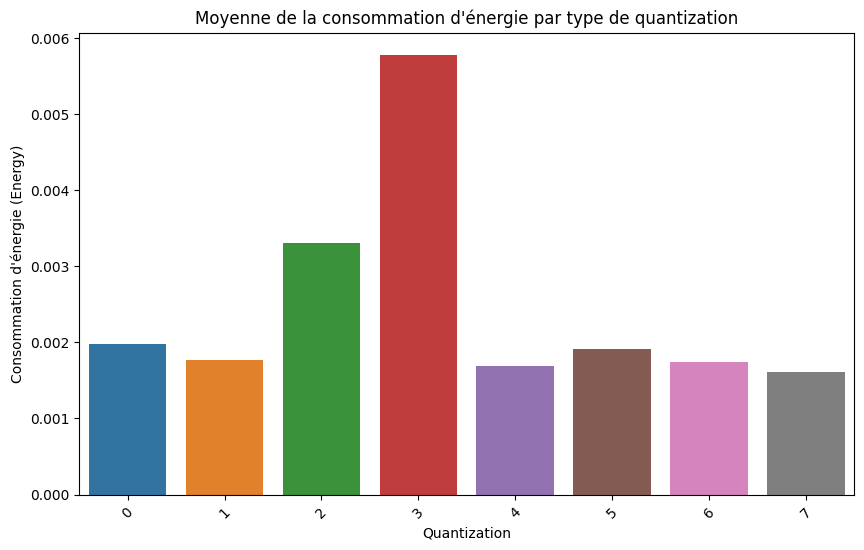

In [23]:
quantization_energy_mean = df_encoded.groupby(
    'quantization')['energy_per_token'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='quantization', y='energy_per_token',
            data=quantization_energy_mean)
plt.title('Moyenne de la consommation d\'énergie par type de quantization')
plt.xlabel('Quantization')
plt.ylabel('Consommation d\'énergie (Energy)')
plt.xticks(rotation=45)
plt.show()

# analyser la relation entre la variable 'latency' et les variables 'quantization', 'optimization' et 'dtype'

# Latence : temps global nécessaire au modèle pour générer la réponse complète pour un utilisateur.

Relation entre 'latency' et 'quantization'

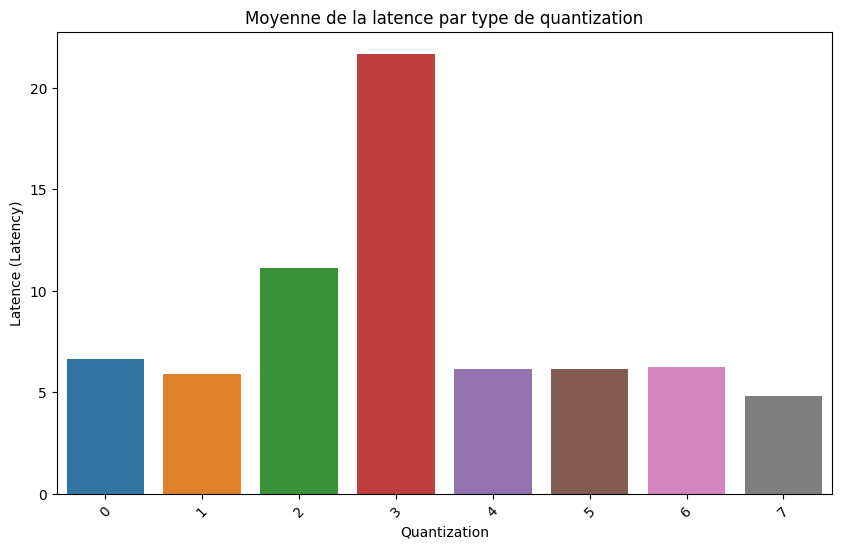

In [24]:
# Calcul de la moyenne de 'latency' pour chaque type de 'quantization'
quantization_latency_mean = df_encoded.groupby(
    'quantization')['latency'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='quantization', y='latency', data=quantization_latency_mean)
plt.title('Moyenne de la latence par type de quantization')
plt.xlabel('Quantization')
plt.ylabel('Latence (Latency)')
plt.xticks(rotation=45)
plt.show()

Relation entre 'latency' et 'optimization'

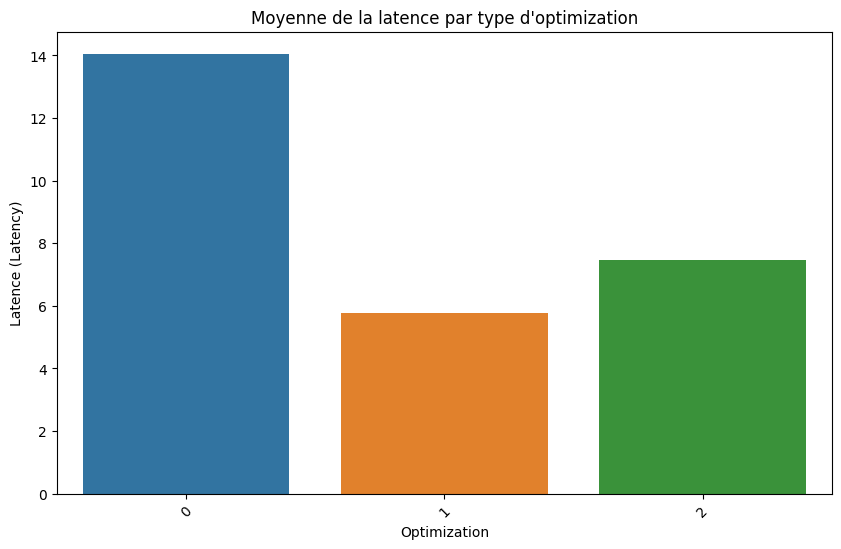

In [25]:
# Calcul de la moyenne de 'latency' pour chaque type d'optimization
optimization_latency_mean = df_encoded.groupby(
    'optimization')['latency'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='optimization', y='latency', data=optimization_latency_mean)
plt.title('Moyenne de la latence par type d\'optimization')
plt.xlabel('Optimization')
plt.ylabel('Latence (Latency)')
plt.xticks(rotation=45)
plt.show()

Relation entre 'latency' et 'dtype'

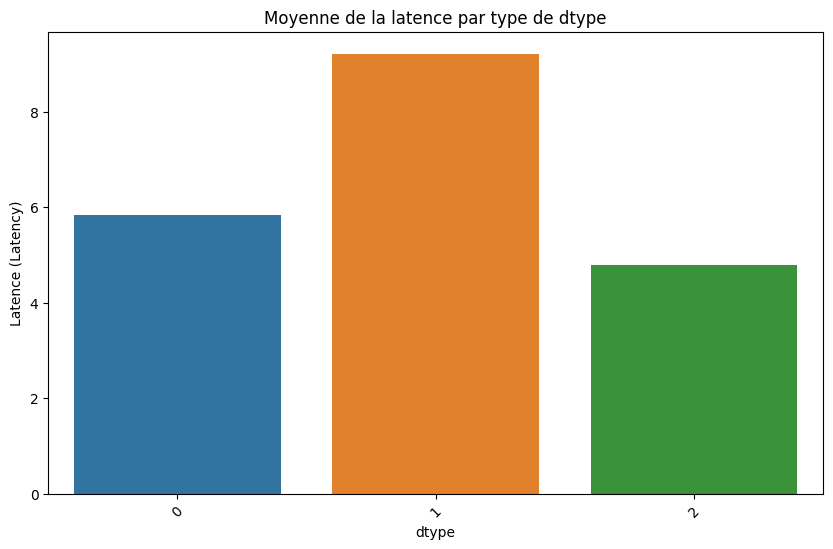

In [26]:
# Calcul de la moyenne de 'latency' pour chaque type de 'dtype'
dtype_latency_mean = df_encoded.groupby(
    'dtype')['latency'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='dtype', y='latency', data=dtype_latency_mean)
plt.title('Moyenne de la latence par type de dtype')
plt.xlabel('dtype')
plt.ylabel('Latence (Latency)')
plt.xticks(rotation=45)
plt.show()

# analyser la relation entre la variable 'throughput' et les variables 'quantization', 'optimization' et 'dtype'

# Débit : nombre de jetons de sortie par seconde qu'un serveur d'inférence peut générer pour tous les utilisateurs et requêtes.

Relation entre 'throughput' et 'quantization'

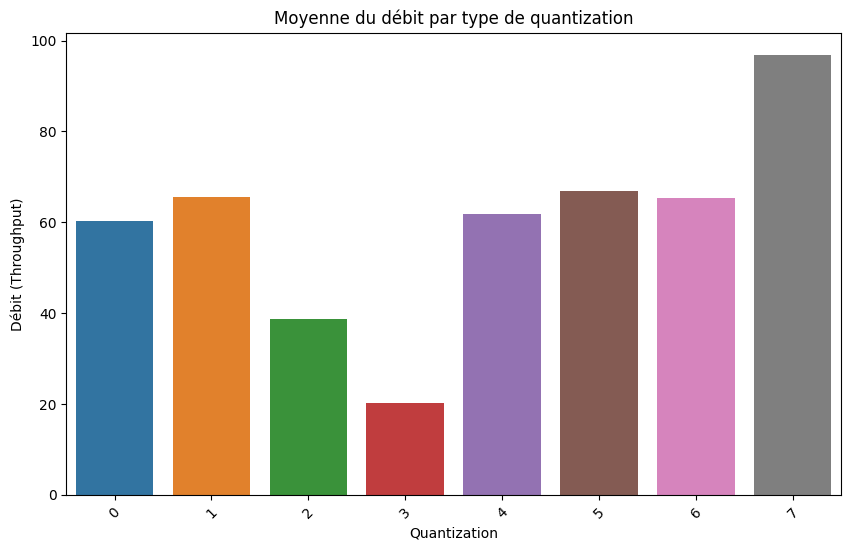

In [27]:
# Calcul de la moyenne de 'throughput' pour chaque type de 'quantization'
quantization_throughput_mean = df_encoded.groupby(
    'quantization')['throughput'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='quantization', y='throughput',
            data=quantization_throughput_mean)
plt.title('Moyenne du débit par type de quantization')
plt.xlabel('Quantization')
plt.ylabel('Débit (Throughput)')
plt.xticks(rotation=45)
plt.show()

Relation entre 'throughput' et 'optimization'

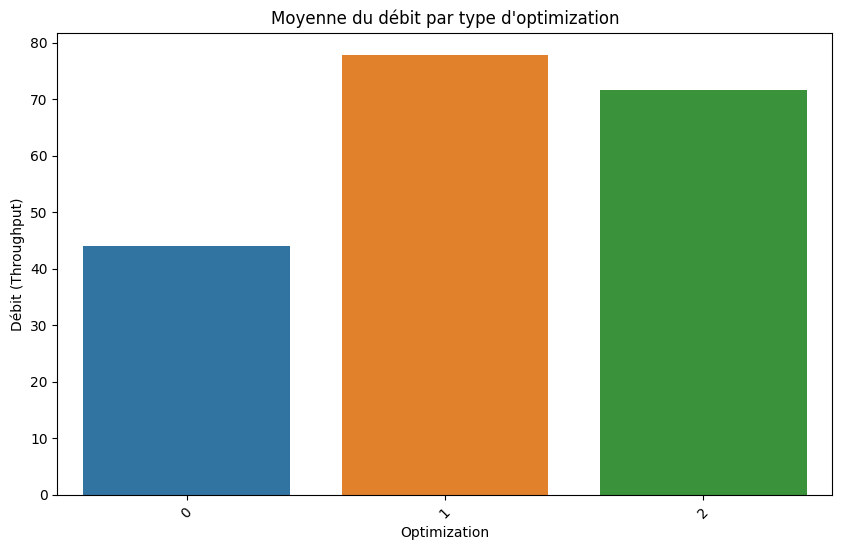

In [28]:
# Calcul de la moyenne de 'throughput' pour chaque type d'optimization
optimization_throughput_mean = df_encoded.groupby(
    'optimization')['throughput'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='optimization', y='throughput',
            data=optimization_throughput_mean)
plt.title('Moyenne du débit par type d\'optimization')
plt.xlabel('Optimization')
plt.ylabel('Débit (Throughput)')
plt.xticks(rotation=45)
plt.show()

Relation entre 'throughput' et 'dtype'

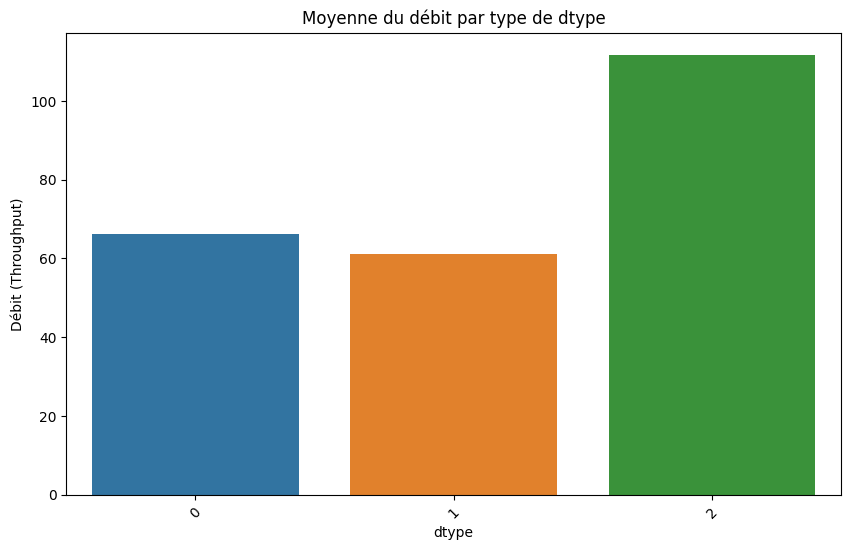

In [29]:
# Calcul de la moyenne de 'throughput' pour chaque type de 'dtype'
dtype_throughput_mean = df_encoded.groupby(
    'dtype')['throughput'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='dtype', y='throughput', data=dtype_throughput_mean)
plt.title('Moyenne du débit par type de dtype')
plt.xlabel('dtype')
plt.ylabel('Débit (Throughput)')
plt.xticks(rotation=45)
plt.show()